<a href="https://colab.research.google.com/github/orlandxrf/curso-dl/blob/main/notebooks/8a_CharacterRNN_Names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de nombres con un RNN a nivel de carácter

Tomado de [CLASSIFYING NAMES WITH A CHARACTER-LEVEL RNN](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)



## Obtener y descargar el conjunto de datos

In [ ]:
# establecer parametros para almacenar y cargar el conjunto de datos del repositorio de Github
import os

names = [
  "Arabic.txt",
  "Chinese.txt",
  "Czech.txt",
  "Dutch.txt",
  "English.txt",
  "French.txt",
  "German.txt",
  "Greek.txt",
  "Irish.txt",
  "Italian.txt",
  "Japanese.txt",
  "Korean.txt",
  "Polish.txt",
  "Portuguese.txt",
  "Russian.txt",
  "Scottish.txt",
  "Spanish.txt",
  "Vietnamese.txt",
]

base_url = 'https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/names/'
data_folder = 'names'

# crear carpeta para almacenar el conjunto de datos
! mkdir {data_folder}

for name in names:
  file_path = os.path.join(data_folder, name)
  url = f"{base_url}{name}"
  print (f"\tDescargando {url}")
  # descargar conjunto de datos y alamcenar
  ! wget -nc {url} -O {file_path}

# # comprobrar
! ls -lh names/*

mkdir: cannot create directory ‘names’: File exists
	Descargando https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/names/Arabic.txt
File ‘names/Arabic.txt’ already there; not retrieving.
	Descargando https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/names/Chinese.txt
File ‘names/Chinese.txt’ already there; not retrieving.
	Descargando https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/names/Czech.txt
File ‘names/Czech.txt’ already there; not retrieving.
	Descargando https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/names/Dutch.txt
File ‘names/Dutch.txt’ already there; not retrieving.
	Descargando https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/names/English.txt
File ‘names/English.txt’ already there; not retrieving.
	Descargando https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/names/French.txt
File ‘names/French.txt’ already there; not retrieving.
	Descargando https://raw.githubusercontent.com/orlandxrf/cur

In [ ]:
! ls -lh names/*

-rw-r--r-- 1 root root  13K Mar  2 03:50 names/Arabic.txt
-rw-r--r-- 1 root root 1.3K Mar  2 03:50 names/Chinese.txt
-rw-r--r-- 1 root root 3.9K Mar  2 03:50 names/Czech.txt
-rw-r--r-- 1 root root 2.3K Mar  2 03:50 names/Dutch.txt
-rw-r--r-- 1 root root  27K Mar  2 03:50 names/English.txt
-rw-r--r-- 1 root root 2.2K Mar  2 03:50 names/French.txt
-rw-r--r-- 1 root root 5.5K Mar  2 03:50 names/German.txt
-rw-r--r-- 1 root root 2.0K Mar  2 03:50 names/Greek.txt
-rw-r--r-- 1 root root 1.9K Mar  2 03:50 names/Irish.txt
-rw-r--r-- 1 root root 5.6K Mar  2 03:50 names/Italian.txt
-rw-r--r-- 1 root root 7.5K Mar  2 03:50 names/Japanese.txt
-rw-r--r-- 1 root root  423 Mar  2 03:50 names/Korean.txt
-rw-r--r-- 1 root root 1.2K Mar  2 03:50 names/Polish.txt
-rw-r--r-- 1 root root  554 Mar  2 03:50 names/Portuguese.txt
-rw-r--r-- 1 root root  84K Mar  2 03:50 names/Russian.txt
-rw-r--r-- 1 root root  752 Mar  2 03:50 names/Scottish.txt
-rw-r--r-- 1 root root 2.3K Mar  2 03:56 names/Spanish.txt
-rw-r

## Preparar los datos



In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
print (f"all_letters:\t{all_letters}")
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print (category_lines.keys())

['names/German.txt', 'names/Russian.txt', 'names/Greek.txt', 'names/Vietnamese.txt', 'names/Chinese.txt', 'names/Polish.txt', 'names/English.txt', 'names/Scottish.txt', 'names/Portuguese.txt', 'names/French.txt', 'names/Korean.txt', 'names/Dutch.txt', 'names/Czech.txt', 'names/Italian.txt', 'names/Irish.txt', 'names/Japanese.txt', 'names/Spanish.txt', 'names/Arabic.txt']
all_letters:	abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
Slusarski
dict_keys(['German', 'Russian', 'Greek', 'Vietnamese', 'Chinese', 'Polish', 'English', 'Scottish', 'Portuguese', 'French', 'Korean', 'Dutch', 'Czech', 'Italian', 'Irish', 'Japanese', 'Spanish', 'Arabic'])


In [ ]:
print(category_lines['Italian'][:5])
print(category_lines['Spanish'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']
['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal']


## Convertir nombres en tensores

In [ ]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


## Crear la Red Neuronal Recurrente
Estructura de la RNN, contiene solo 2 capas lineales que operan en un estado oculto y de entrada, con una capa LogSoftmax después de la salida.

![Forward](https://drive.google.com/uc?id=1oR-6-czB--j9LeDGdGnltybC3OmZkDQE)

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

Para ejecutar un paso de esta red, necesitamos pasar una entrada (en nuestro caso, el tensor de la letra actual) y un estado oculto anterior (que inicializamos como ceros al principio). Obtendremos la salida (probabilidad de cada idioma) y un siguiente estado oculto (que guardamos para el siguiente paso).

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

print (f"all_letters:\t{all_letters}\tLongitud: {len(all_letters)}\n\n")
print (f"input:\t{input}\n{input.shape}\n")
print (f"hidden:\t{hidden}\n{hidden.shape}\n")
print (f"output:\t{output}\n{output.shape}\n\n")

print (f"all_categories:\t{all_categories}\nLongitud:\t{len(all_categories)}")

all_letters:	abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'	Longitud: 57


input:	tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 57])

hidden:	tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])
torch.Size([1, 128])

output:	tensor([[-2.95

En aras de la eficiencia, no queremos crear un nuevo Tensor para cada paso, por lo que usaremos lineToTensor en lugar de letterToTensor y usaremos particiones. Esto podría optimizarse aún más precomputando lotes de tensores.

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)


print (f"all_letters:\t{all_letters}\tLongitud: {len(all_letters)}\n\n")
print (f"input:\t{input}\n{input.shape}\n")
print (f"hidden:\t{hidden}\n{hidden.shape}\n")
print (f"output:\t{output}\n{output.shape}\n\n")

print (f"all_categories:\t{all_categories}\nLongitud:\t{len(all_categories)}")


all_letters:	abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'	Longitud: 57


input:	tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.

## Entrenamiento

### Preparar el entrenamiento

Antes de entrar en el entrenamiento, debemos hacer algunas funciones de ayuda. El primero es interpretar la salida de la red, que sabemos que es una probabilidad de cada categoría. Podemos usar `Tensor.topk` para obtener el índice de mayor valor:


In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    # print (f"top_n:\t{top_n}\ntop_i:\t{top_i}\n")

    category_i = top_i[0].item()
    # print (f"category_i:\t{category_i}\n")
    
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Dutch', 11)


También definimos una forma rápida de obtener un ejemplo de entrenamiento (un nombre y su idioma):

In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Arabic / line = Awad
category = Scottish / line = Kennedy
category = Portuguese / line = Nunes
category = Japanese / line = Komatsu
category = Italian / line = Bonomo
category = Vietnamese / line = Han
category = French / line = Thayer
category = Italian / line = De laurentis
category = Korean / line = Baik
category = Czech / line = Jirovy


### Entrenar la red

Ahora todo lo que se necesita para entrenar esta red es mostrarle un muchos ejemplos, hacer que adivine y decirle si está mal. Para la función de pérdida se elige: la **pérdida de probabilidad logarítmica negativa** `nn.NLLLoss` (The negative log likelihood loss), ya que la última capa de la RNN es `nn.LogSoftmax`.

In [ ]:
criterion = nn.NLLLoss()

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 3.0981 Jeffries / French ✗ (English)
10000 10% (0m 10s) 2.4677 Gagne / Arabic ✗ (French)
15000 15% (0m 15s) 1.1671 Huynh / Vietnamese ✓
20000 20% (0m 20s) 1.6771 Dagher / Arabic ✓
25000 25% (0m 24s) 1.9108 Belo / Spanish ✗ (Portuguese)
30000 30% (0m 29s) 3.5934 Inoue / French ✗ (Japanese)
35000 35% (0m 34s) 1.1779 Jiu / Korean ✗ (Chinese)
40000 40% (0m 39s) 1.3668 Belrose / German ✗ (French)
45000 45% (0m 44s) 0.2902 Fernandes / Portuguese ✓
50000 50% (0m 49s) 0.9898 An / Vietnamese ✓
55000 55% (0m 54s) 0.6206 Naifeh / Arabic ✓
60000 60% (0m 59s) 1.0228 Faure / French ✓
65000 65% (1m 4s) 0.3604 Chou / Korean ✓
70000 70% (1m 9s) 1.0511 Tsahalis / Greek ✓
75000 75% (1m 14s) 1.1378 Song / Chinese ✗ (Korean)
80000 80% (1m 19s) 1.8682 Yount / German ✗ (French)
85000 85% (1m 24s) 2.6440 Lanham / Irish ✗ (English)
90000 90% (1m 29s) 0.0056 Bouloukos / Greek ✓
95000 95% (1m 34s) 1.5244 Schultheiss / Dutch ✗ (German)
100000 100% (1m 39s) 1.5971 Elmes / English ✓


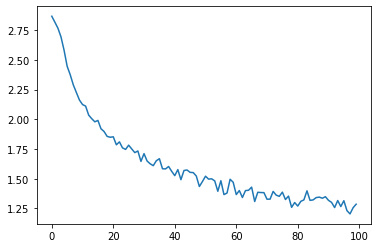

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)